# Magiske slanger

<center>
<figure style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}">
<img
    src="images/DALL·E 2023-03-18 20.01.53 - a cartoon snake with a black hoodie typing on a laptop (cleaned).png"
    alt="a cartoon snake with a black hoodie typing on a laptop"
    width="768px"
/>
<footer><small>Lagd med DALL·E 2 og justert av meg</small></footer>
</figure>
</center>

## Alt er objekter
Inkludert data, klasser, typer, funksjoner og kode

som blir pekt til av variabler (navn)



```python
a = b = 2

print(a, b)

a = "Bouvet"

print(a)
print(b)
```


## Eksempl(ar)er

<center>
    <figure>
        <img
             src="https://d38mjcf1nvhlba.cloudfront.net/media/o/1656679102/dsc-3326-1.jpg"
             alt="To pingvier på Akvariet i Bergen. Ping Kong til venstre og Ealinor Roosivelt til høyre"
             style="height: 768px;"
        />
        <footer><small>To pingvier på Akvariet i Bergen. Ping Kong til venstre og Ealinor Roosivelt til høyre
            <br>&copy; Akvariet i Bergen</small></footer>
    </figure>
</center>

Mye av syntaksen til Python har egne funksjoner / metoder assisiert med seg.
I mange tilfeller, gjør det det _mye_ lettere å lese og å forstå hva koden gjør.

Mange av disse metodene begynner og slutter med `__` (kalt "dunder").

`type` er en funksjon som kan gi tilbake typen på et objekt, eller lage en ny type (1 vs. 3 argumenter)

`__new__` er en statisk metode alle objekter har (fordi alle arver fra `object`)

Det er ingenting som hinder oss fra å endre navnene på selve metodene, så lenge den har navnet `__ini__` i `dict`-en vi gir til `type`

In [ ]:
def __init__(self, name: str):
    self._name = name

In [ ]:
Penguin = type("Penguin", (object,), {
    "__init__": __init__,
    "name": property(lambda self: self._name)
})

penguin = Penguin.__new__(Penguin)
Penguin.__init__(penguin, "Pingrid Alexandra")

In [ ]:
class Penguin:
    def __init__(self, name: str):
        self._name = name

    @property
    def name(self):
        return self._name
        
penguin = Penguin("Pingrid Alexandra")

print(penguin.name)

## 🪄 Tid for litt dypere (hverdags) magi


<center>
    <figure>
        <img
             src="https://images.unsplash.com/photo-1614767629805-3bbcf6e26c7d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1760&q=80"
             alt="Foto av forskjellige terninger med forsjellig antall sider på et spillprett"
             style="height: 768px;"
        />
        <footer><small>Foto av <a href="https://unsplash.com/@nika_benedictova?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nika Benedictova</a> på <a href="https://unsplash.com/s/photos/dice?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></small></footer>
    </figure>
</center>
    

## 🪄 Tid for litt dypere (hverdags) magi

I mange rollespill, har man forskjellige terninger, typisk med 4, 6, 10, 12 og 20 sider
(én av disse er ikke som de andre)

La oss lage en!

Enkel terning med `n` sider

```python
import random
import math
from typing import Self


class Dice:
    def __init__(self, sides: int):
        self.sides = sides

    def roll(self) -> int:
        # Alternativ måte å gjøre det på
        # math.floor(random.random() * self.sides) + 1
        return random.randrange(1, self.sides + 1)

    def __str__(self):
        # en mye brukt notasjon er d<s>
        return f"d{self.sides}"
    
    def __repr__(self):
        # generelt, bør __repr__ gi tilbake en streng som vil lage selve objektet,
        # men det ser ikke like fint ut her
        # Hvis vi skulle gjort det, kan det gjøres slik
        # return f"{self.__class__.__name__}({self.sides})"
        return str(self)
    
    # Hva med sammenligning;
    # bryr vi oss om terningene er distinkte objekter, eller holder det med
    # at de har samme antall sider?
    def __eq__(self, other: Self):
        if not isinstance(other, self.__class__):
            return False
        return self.sides == other.sides
    
    def __hash__(self):
        # Should not be here if __eq__ is not defined
        return hash(str(self))

```

## 🪄 Tid for litt dypere (hverdags) magi

Én terning er fint det, men man har gjerne felre av samme type og triller dem samtidig.
For eksempel for å gjøre skade på et annet vesen.
Det kan bli fort bli mange terninger å trille og å summere.

La oss gjøre noe med det. Det er jo en av grunnene til at menneskeheten fant opp regnemaskinen.

Flere terninger samlet

Grunnen til at vi arver her, er latskap; jeg slipper å skrive koden på nytt og den blir mer kompakt.


```python
class Dice(Dice):
    def __init__(self, sides: int, num: int = 1):
        super().__init__(sides)
        self.num = num

    def __rmul__(self, other: int):
        if not isinstance(other, int):
            # NB: Den returnerer og kaster ikke et unntak!
            return NotImplemented
        return self.__class__(self.sides, other)

    def roll(self):
        total = 0
        for _ in range(self.num):
            total += super().roll()
        return total
    
    def __str__(self):
        return f"{self.num if self.num > 1 else ''}{super().__str__()}"

```

eksempler

```python
d10 = Dice(10)
_6d10 = 6 * d10
_6d10.roll()    
```

## 🪄 Tid for litt dypere (hverdags) magi

Noen handliger har også et fast tillegg, eller fratrekk.

Terninger med modifikator


```python
class Dice(Dice):
    def __init__(self, sides: int, num: int = 1, modifier: int = 0):
        super().__init__(sides, num)
        self.modifier = modifier
    
    def __add__(self, other):
        return self.__class__(self.sides, self.num, other)
    
    def __str__(self):
        modifier = ""
        if self.modifier > 0:
            modifier = f" + {self.modifier}"
        elif self.modifier < 0:
            modifier = f" - {abs(self.modifier)}"
        return super().__str__() + modifier
    
    def roll(self):
        return super().roll() + self.modifier
    
    # Det kan bli litt kjedelig å skrive `.roll()` hele tiden.
    # Hva med bare ()?
    def __call__(self):
        return self.roll()
```

Eksempler

```python

die = 2 * Dice(12) + 2
```

## 🧙‍♂️Tid for magi


Ville det ikke vært fint å kunne skrive

```python
Dice._4d12
```

og så fått printet resultatet?

In [ ]:
import re

In [ ]:
_regex = re.compile(r"^(?P<number>\d+)?d(?P<sides>\d+) *((?P<sign>[-+]) *(?P<modifier>\d+)?)?$")
_Dice = Dice

In [ ]:
def parse(text: str) -> _Dice:
    match = _regex.match(text)
    if match is None:
        raise ValueError("Invalid format")

    def _get_number(key: str, default : int) -> int:
        if (value := match[key]) is not None:
            return int (value)
        return default

    match = match.groupdict()
    number = _get_number("number", 1)
    sides = int(match["sides"])
    modifier = _get_number("modifier", 0)
    if match["sign"] == "-":
        modifier = -modifier
    return _Dice(sides, number, modifier)

Her er det et lite regulært uttrykk. Det er ikke særlig magisk (når en skriver det selv og husker hva det gjør)

La oss lage et slikt objekt!

```python
class Dice:
    def __getattr__(self, item: str):
        item = (
            item
            .removeprefix("_")
            .replace("_", " ")
            .replace("p", "+")
            .replace("m", "-")
        )
        return parse(item)
```

Her må vi dessverre instansiere et objekt for at det skal fungere som forventet, men det finnes en løsning.
Siden `__getattr__` er definert på klassen, men brukt på instanser, trenger vi bare å gjøre tilsvarende for denne klassen.

```python
class Meta(type):
    def __getattr__(cls, item: str):
        item = (
            item
            .removeprefix("_")
            .replace("_", " ")
            .replace("p", "+")
            .replace("m", "-")
        )
        return parse(item)

class Dice(metaclass=Meta):
    pass
```

<center>
    <span style="font-size: 40rem">
        ?
    </span>
</center>

<center>
    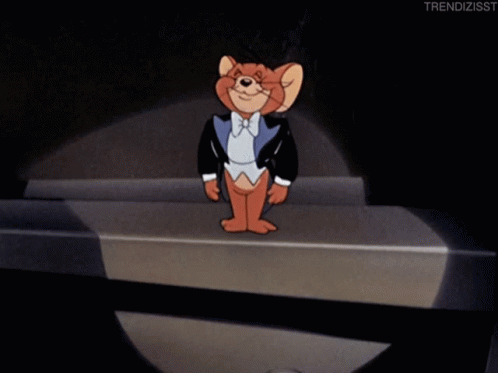
</center>